## ```Develop A Neural Network That Can Read Handwriting```

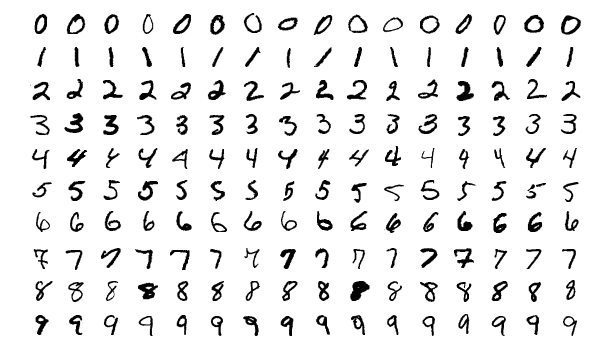

Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners. Dataset can be seen on MNIST or can find [here.](https://www.canva.com/link?target=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FMNIST_database&design=DAEjrwWV35w)

# Experimenting on MNIST

### About MNIST Dataset

 The **MNIST** database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems
 
 The **MNIST** database contains 60,000 training images and 10,000 testing images.
 Photo size: **28x28 p**.

### The Purpose of notebook

I will design and try two neural networks to get ~100% accuracy
- MLP (Multilayer perceptron)

- CNN (Convolutional neural network)

**Update:**
- I made this notebook 7 months ago, and it is one of my first data science projects. During this time I learned a lot of interesting things and put these things in here.

### Importing libs

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

np.random.seed(0) 
import random

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import model_from_json

from keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  Reading data

### Click [Dataset](https://www.kaggle.com/c/digit-recognizer/data)

In [2]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

train = pd.read_csv("./mnist_train.csv")
test = pd.read_csv("./mnist_test.csv")


X_train = train.drop(labels = ["label"], axis = 1)
y_train = train['label']

X_test = test

print(X_train.shape, X_test.shape)

(42000, 784) (28000, 784)


In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [9]:
train.value_counts()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  pixel73  pixel74  pixel75  pixel76  pixel77  pixel78  pixel79  pixel80  pixel81  pixel82  pixel83  pixel84  pixel85  pixel86  pixel87  pixel88  pixel89  pixel90  pixel91  pixel92  pixel93  pixel94  pixel95  pixel96  pixel97  pixel98  pixel99  pixel100  pixel101  pixel102  pixel103  pixel104  pixel105  pixel106  pixel107  pixel108  pixel109  pix

In [10]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [11]:
test.value_counts()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  pixel73  pixel74  pixel75  pixel76  pixel77  pixel78  pixel79  pixel80  pixel81  pixel82  pixel83  pixel84  pixel85  pixel86  pixel87  pixel88  pixel89  pixel90  pixel91  pixel92  pixel93  pixel94  pixel95  pixel96  pixel97  pixel98  pixel99  pixel100  pixel101  pixel102  pixel103  pixel104  pixel105  pixel106  pixel107  pixel108  pixel109  pixel110  

In [12]:
test.dtypes

pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 784, dtype: object

In [13]:
X = train.drop(["label"],axis = 1).values
y = train["label"].values

In [14]:
train.corr()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.033424,0.025050,0.019558,0.014490,0.009790,0.006075,NaN,NaN,NaN,NaN
pixel0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel779,0.006075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000240,-0.000174,-0.000124,0.236633,0.905835,1.000000,NaN,NaN,NaN,NaN
pixel780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
test.corr()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
pixel0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [16]:
X_train_plot = X_train.values.reshape(-1, 28, 28)

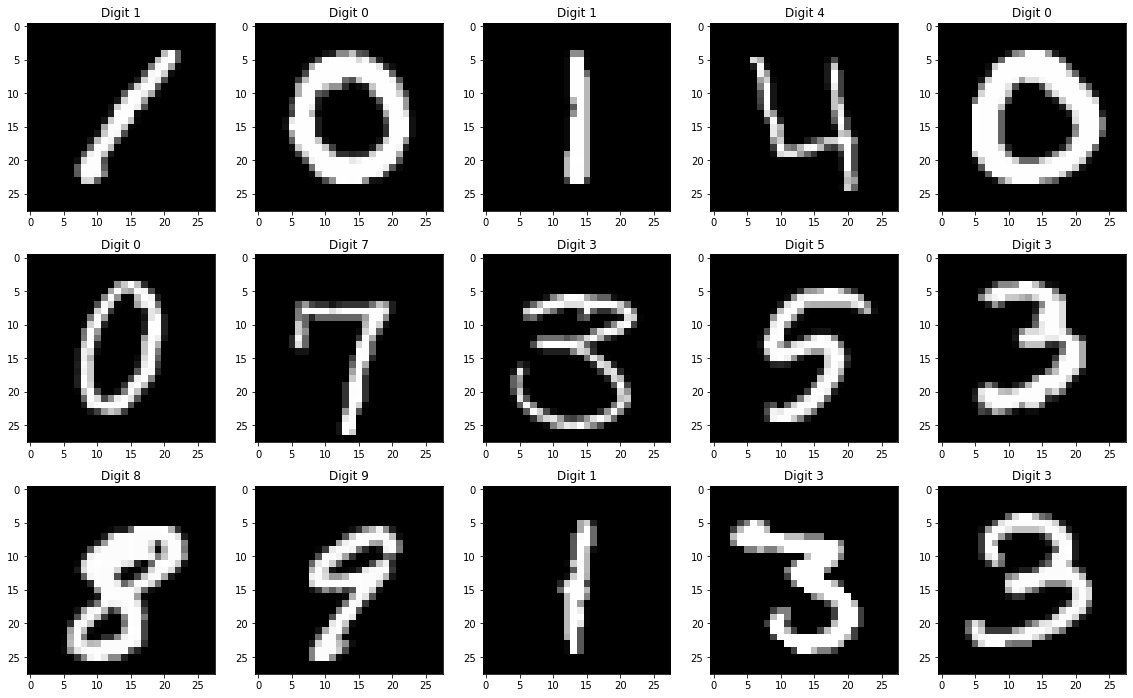

In [17]:
def Show_example_digits(mono = 'gray'):
    fig = plt.figure(figsize = (16, 16))
    for idx in range(15):
        plt.subplot(5, 5,idx+1)
        plt.imshow(X_train_plot[idx], cmap = mono)
        plt.title("Digit {}".format(y_train[idx]))
        
    plt.tight_layout()
    
Show_example_digits()

In [18]:
# Function return digit in grayscale
def plot_digit(digit, dem = 28, font_size = 12):
    max_ax = font_size * dem
    
    fig = plt.figure(figsize=(13, 13))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')
    black = '#000000'
    
    for idx in range(dem):
        for jdx in range(dem):

            t = plt.text(idx * font_size, max_ax - jdx*font_size, digit[jdx][idx], fontsize = font_size, color = black)
            c = digit[jdx][idx] / 255.
            t.set_bbox(dict(facecolor=(c, c, c), alpha = 0.5, edgecolor = 'black'))
            
    plt.show()

2


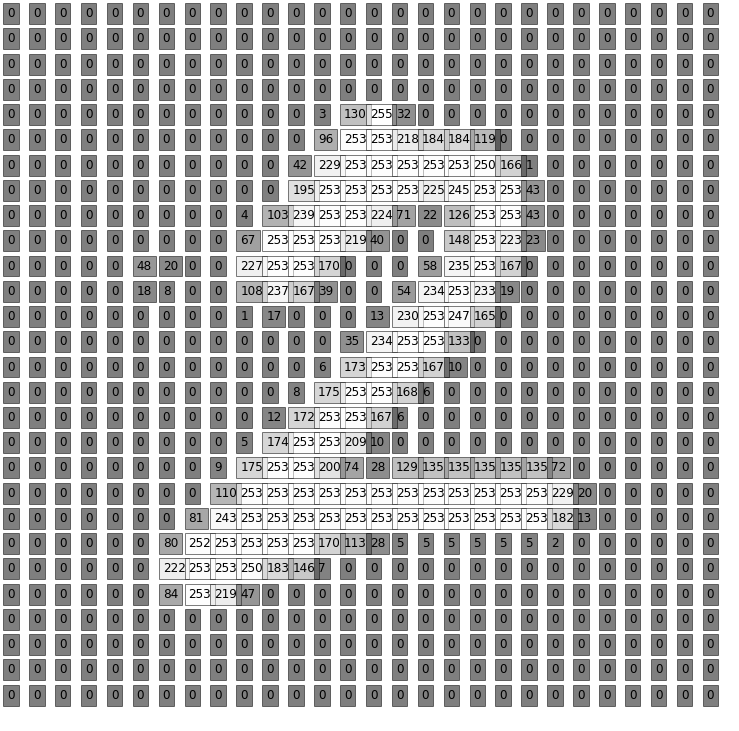

In [19]:
rand_number = random.randint(0, len(y_train))
print(y_train[rand_number])
plot_digit(X_train_plot[rand_number])

#### Chart of the number of digits in the data

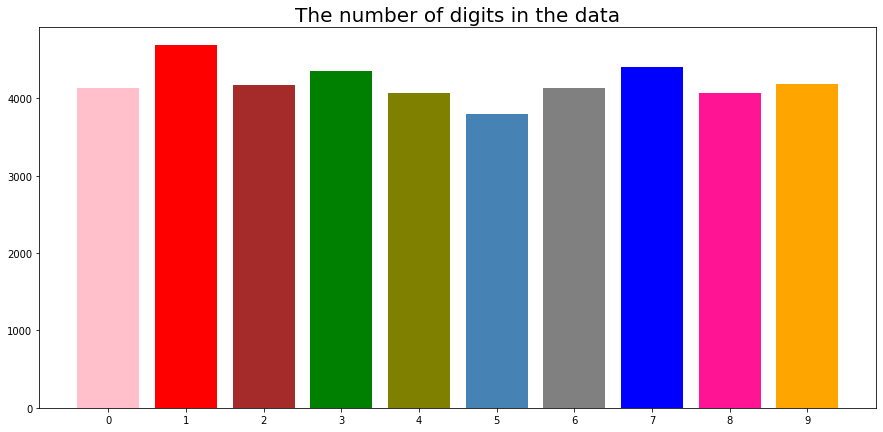

In [20]:
digit_range = np.arange(10)

val = y_train.value_counts().index
cnt = y_train.value_counts().values
mycolors = ['red', 'blue', 'green', 'orange', 'brown', 'grey', 'pink', 'olive', 'deeppink', 'steelblue']

plt.figure(figsize = (15, 7))
plt.title("The number of digits in the data", fontsize = 20)
plt.xticks(range(10))
plt.bar(val, cnt, color = mycolors);

### Data Preparing

In [21]:
img_rows, img_cols = 28, 28

num_pixels = X_train.shape[1] 

input_shape = (img_rows, img_cols)

In [22]:
# Data Normalization [0, 1]
X_train /= 255
X_test /= 255

# one-hot encoding for target column
y_train = to_categorical(y_train)

# | [0, 1, 2, ... , 9] | = 10
num_classes = y_train.shape[1]

# Number of objects, vector size (28 * 28)
print(X_train.shape, X_test.shape)

(42000, 784) (28000, 784)


#### Split data

added stratified folds

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 2, stratify=y_train)

## MLP ([Multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron))

### Structure

Firstly, let's think how the network should look like. It will have three layers:

1 Input Layer

2 Hidden Layer

3 Output Layer

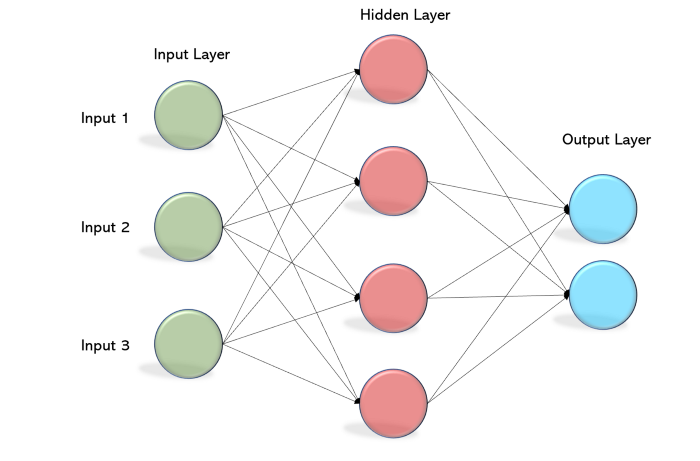

#### Step 3 — Defining the Neural Network Architecture

The architecture of the neural network refers to elements such as the number of layers in the network, the number of units in each layer, and how the units are connected between layers. As neural networks are loosely inspired by the workings of the human brain, here the term unit is used to represent what we would biologically think of as a neuron. Like neurons passing signals around the brain, units take some values from previous units as input, perform a computation, and then pass on the new value as output to other units. These units are layered to form the network, starting at a minimum with one layer for inputting values, and one layer to output values. The term hidden layer is used for all of the layers in between the input and output layers, i.e. those “hidden” from the real world.

Different architectures can yield dramatically different results, as the performance can be thought of as a function of the architecture among other things, such as the parameters, the data, and the duration of training.

Add the following lines of code to your file to store the number of units per layer in global variables. This allows us to alter the network architecture in one place, and at the end of the tutorial you can test for yourself how different numbers of layers and units will impact the results of our model:

In [24]:
n_input = 784  # input layer (28x28 pixels)
n_hidden1 = 512  # 1st hidden layer
n_hidden2 = 256  # 2nd hidden layer
n_hidden3 = 128  # 3rd hidden layer
n_output = 10  # output layer (0-9 digits)

The following diagram shows a visualization of the architecture we’ve designed, with each layer fully connected to the surrounding layers:

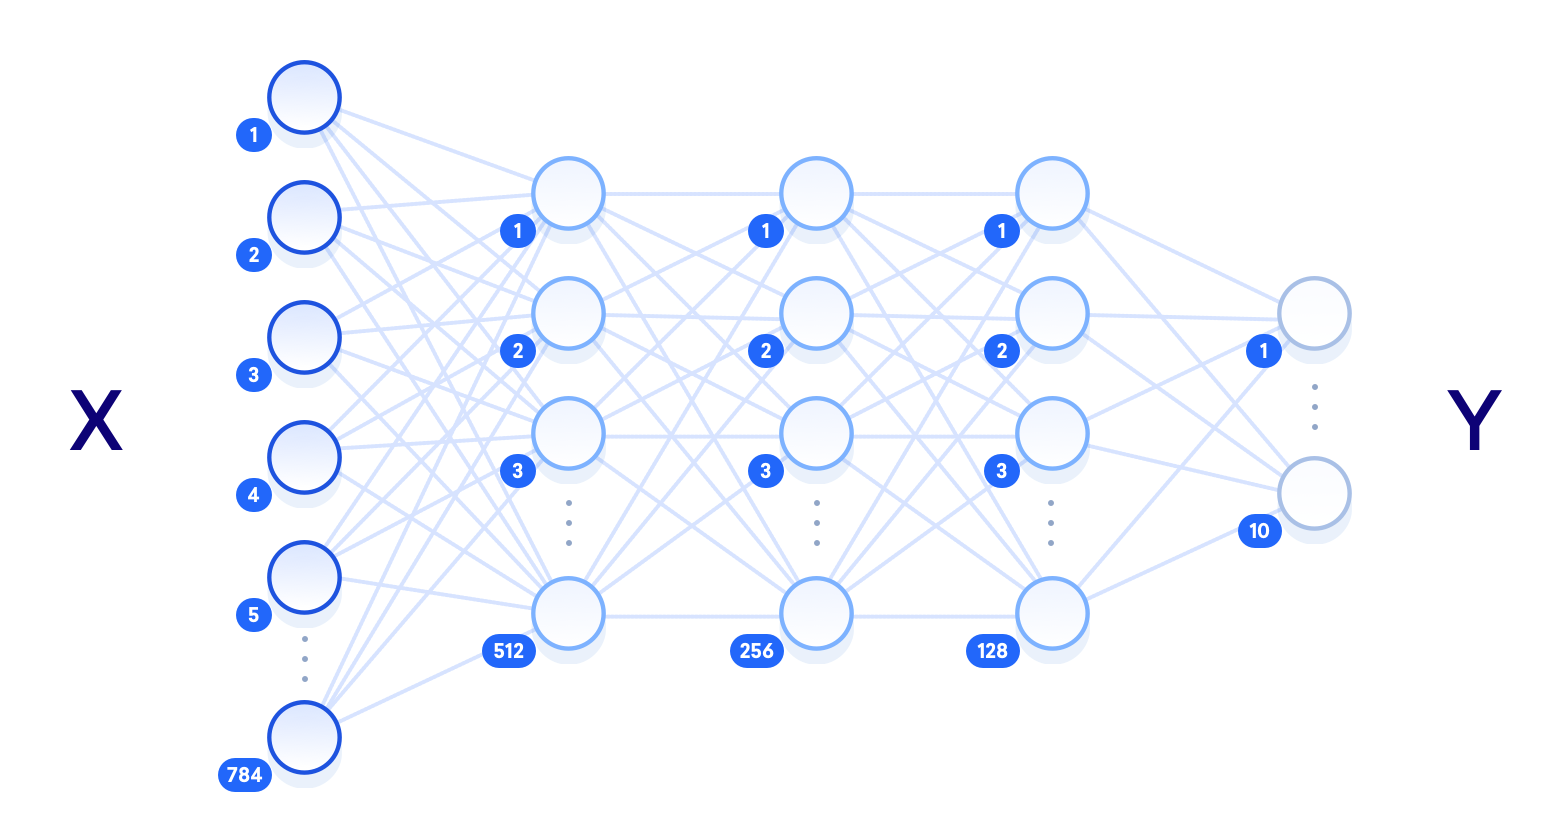

Input layer has 28 * 28 pixels reshape to vector

Hidden layer has a lot of neurons

Output layer has 10 neurons

Design network with using keras

The metrics we use are f1_score

In [25]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#### Function to drawing learning curve history learning neural network

In [26]:
def draw_learning_curve(history, keys=['f1', 'loss']):
    plt.figure(figsize=(20,8))
    for i, key in enumerate(keys):
        plt.subplot(1, 2, i + 1)
        sns.lineplot(x = history.epoch, y = history.history[key])
        sns.lineplot(x = history.epoch, y = history.history['val_' + key])
        plt.title('Learning Curve')
        plt.ylabel(key.title())
        plt.xlabel('Epoch')
#         plt.ylim(ylim)
        plt.legend(['train', 'test'], loc='best')
    plt.show()

## Adding Callbacks

- EarlyStopping (Stop training when a monitored metric has stopped improving)
- ReduceLROnPlateau (Reduce learning rate when a metric has stopped improving)
- ModelCheckpoint (Callback to save the Keras model or model weights at some frequency)

In [27]:
def callbacks(name): 
    return [ 
        EarlyStopping(monitor = 'loss', patience = 6), 
        ReduceLROnPlateau(monitor = 'loss', patience = 3), 
        ModelCheckpoint(f'../working/{name}.hdf5', save_best_only=True) # saving the best model
    ]

#### Simple MLP with one hidden layer

In [28]:
def get_mlp():
    
    return Sequential([
        #input layer is automatic generation by keras
        
        #hidden layer
        Dense(512, input_dim = num_pixels, activation='relu'),
        
        #output layer
        Dense(num_classes, activation='softmax')
    ])

In [29]:
model = get_mlp()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Our network has 407,050 params (weights)

#### You can use **GPU** to accelerate training

In [30]:
learning_history = model.fit(X_train, y_train,
          batch_size = 1024, epochs = 40, verbose = 2, callbacks = callbacks('simple_mlp'),
          validation_data=(X_val, y_val));

Epoch 1/40
37/37 - 2s - loss: 0.6962 - f1: 0.7174 - val_loss: 0.3275 - val_f1: 0.9013
Epoch 2/40
37/37 - 1s - loss: 0.2727 - f1: 0.9233 - val_loss: 0.2477 - val_f1: 0.9315
Epoch 3/40
37/37 - 1s - loss: 0.2108 - f1: 0.9420 - val_loss: 0.2065 - val_f1: 0.9424
Epoch 4/40
37/37 - 1s - loss: 0.1729 - f1: 0.9531 - val_loss: 0.1764 - val_f1: 0.9484
Epoch 5/40
37/37 - 1s - loss: 0.1457 - f1: 0.9611 - val_loss: 0.1588 - val_f1: 0.9524
Epoch 6/40
37/37 - 1s - loss: 0.1265 - f1: 0.9660 - val_loss: 0.1431 - val_f1: 0.9566
Epoch 7/40
37/37 - 1s - loss: 0.1074 - f1: 0.9710 - val_loss: 0.1279 - val_f1: 0.9589
Epoch 8/40
37/37 - 1s - loss: 0.0938 - f1: 0.9759 - val_loss: 0.1192 - val_f1: 0.9657
Epoch 9/40
37/37 - 1s - loss: 0.0820 - f1: 0.9782 - val_loss: 0.1101 - val_f1: 0.9642
Epoch 10/40
37/37 - 1s - loss: 0.0733 - f1: 0.9807 - val_loss: 0.1044 - val_f1: 0.9671
Epoch 11/40
37/37 - 1s - loss: 0.0648 - f1: 0.9830 - val_loss: 0.0996 - val_f1: 0.9683
Epoch 12/40
37/37 - 1s - loss: 0.0573 - f1: 0.9852 -

In [31]:
score = model.evaluate(X_val, y_val, verbose = 0)
print('Test loss: {}%'.format(score[0] * 100))
print('Test score: {}%'.format(score[1] * 100))

print("MLP Error: %.2f%%" % (100 - score[1] * 100))

Test loss: 7.850626111030579%
Test score: 97.70610928535461%
MLP Error: 2.29%


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


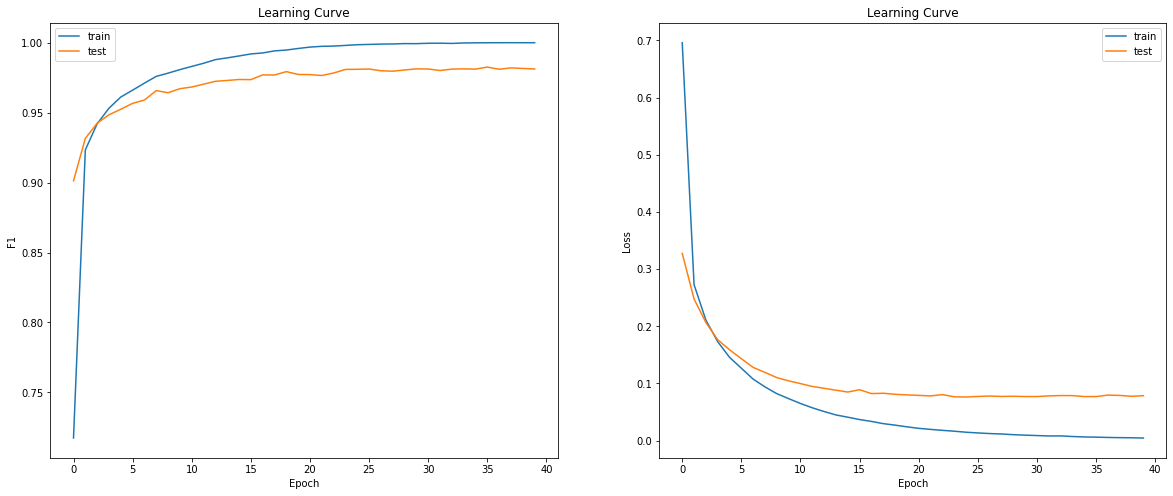

In [33]:
draw_learning_curve(learning_history)

Cool! I get ~98% accuracy with easy model MLP and i didn't work too much.

According to Pareto principle 80/20 in this case 20% work generate ~80%~ 98% accuracy :)

#### Adding new layer and Dropout to avoid overfitting

In [34]:
def get_mlpv2():
    
    return Sequential([
        Dense(512, input_dim=num_pixels, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

In [35]:
model = get_mlpv2()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
________________________________________________

Run new model 

In [36]:
learning_history = model.fit(X_train, y_train,
          batch_size = 1024, epochs = 40, verbose = 2, callbacks = callbacks('mlp_reg'),
          validation_data=(X_val, y_val));

Epoch 1/40
37/37 - 2s - loss: 0.7629 - f1: 0.6888 - val_loss: 0.2733 - val_f1: 0.9135
Epoch 2/40
37/37 - 1s - loss: 0.2491 - f1: 0.9257 - val_loss: 0.1734 - val_f1: 0.9417
Epoch 3/40
37/37 - 1s - loss: 0.1736 - f1: 0.9478 - val_loss: 0.1312 - val_f1: 0.9572
Epoch 4/40
37/37 - 1s - loss: 0.1350 - f1: 0.9591 - val_loss: 0.1158 - val_f1: 0.9618
Epoch 5/40
37/37 - 2s - loss: 0.1091 - f1: 0.9671 - val_loss: 0.0975 - val_f1: 0.9690
Epoch 6/40
37/37 - 2s - loss: 0.0929 - f1: 0.9715 - val_loss: 0.0837 - val_f1: 0.9737
Epoch 7/40
37/37 - 1s - loss: 0.0785 - f1: 0.9751 - val_loss: 0.0834 - val_f1: 0.9707
Epoch 8/40
37/37 - 1s - loss: 0.0692 - f1: 0.9780 - val_loss: 0.0816 - val_f1: 0.9696
Epoch 9/40
37/37 - 1s - loss: 0.0550 - f1: 0.9832 - val_loss: 0.0725 - val_f1: 0.9801
Epoch 10/40
37/37 - 1s - loss: 0.0484 - f1: 0.9848 - val_loss: 0.0701 - val_f1: 0.9777
Epoch 11/40
37/37 - 1s - loss: 0.0434 - f1: 0.9862 - val_loss: 0.0743 - val_f1: 0.9752
Epoch 12/40
37/37 - 1s - loss: 0.0407 - f1: 0.9868 -

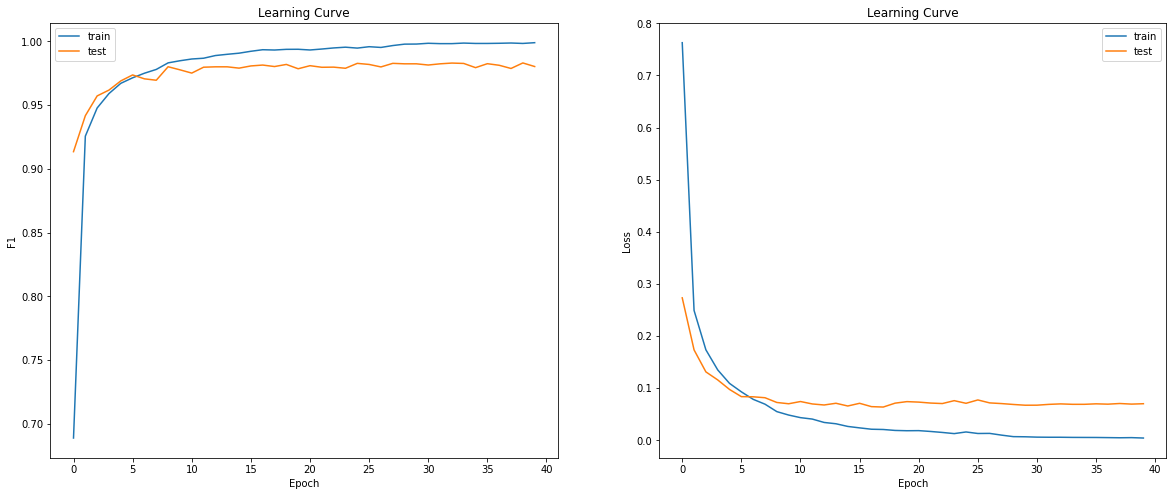

In [37]:
draw_learning_curve(learning_history)

In [38]:
score = model.evaluate(X_val, y_val, verbose = 0)
print('Test loss: {}%'.format(score[0] * 100))
print('Test score: {}%'.format(score[1] * 100))

print("MLP Error: %.2f%%" % (100 - score[1] * 100))

Test loss: 7.0134080946445465%
Test score: 98.13874959945679%
MLP Error: 1.86%


#### I slightly improved the model, so we keep working.

# What is CNN?


CNN stands for Convolutional Neural Networks that are used to extract the features of the images using several layers of filters.

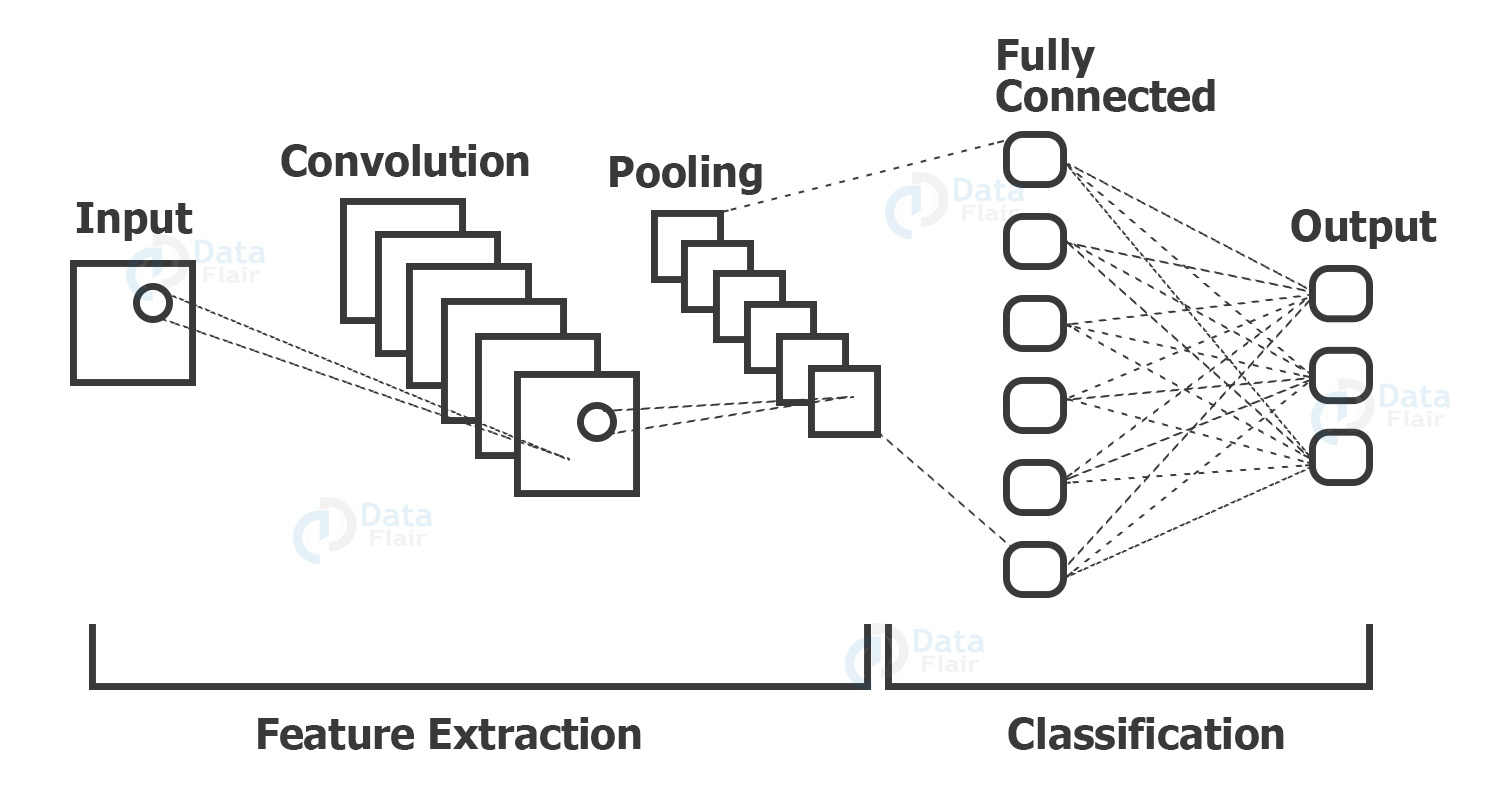

## CNN ([Convolutional_neural_network](https://en.wikipedia.org/wiki/Convolutional_neural_network))

![CNN](https://miro.medium.com/max/1872/1*SGPGG7oeSvVlV5sOSQ2iZw.png)

CNN consists with:

- convolution layer
- in the past MLP

It will use 3 convolutional layers: (Conv2D, Conv2D, pool)

#### We need to reshape data.

In [39]:
X_train.shape

(37800, 784)

In [40]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_val = X_val.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)
input_shape = (28, 28, 1)

In [41]:
def get_cnn():
    return Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = input_shape),
        Conv2D(32, kernel_size=(3, 3), activation='relu' ),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(64, kernel_size=(3, 3), activation='relu' ),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ),
        Conv2D(128, kernel_size=(3, 3), activation='relu' ),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        
        Flatten(),
        
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation = "softmax")
        
    ])

In [42]:
model = get_cnn()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=[f1])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)         

In [43]:
learning_history = model.fit(X_train, y_train,
          batch_size = 128,
          epochs = 50,
          verbose = 1,
          callbacks = callbacks('cnn_v1'),
          validation_data = (X_val, y_val))

Epoch 1/50
296/296 [==============================] - 72s 241ms/step - loss: 0.4754 - f1: 0.8252 - val_loss: 0.0699 - val_f1: 0.9782
Epoch 2/50
296/296 [==============================] - 62s 211ms/step - loss: 0.1039 - f1: 0.9700 - val_loss: 0.0444 - val_f1: 0.9883
Epoch 3/50
296/296 [==============================] - 67s 226ms/step - loss: 0.0713 - f1: 0.9794 - val_loss: 0.0351 - val_f1: 0.9894
Epoch 4/50
296/296 [==============================] - 64s 216ms/step - loss: 0.0577 - f1: 0.9833 - val_loss: 0.0304 - val_f1: 0.9895
Epoch 5/50
296/296 [==============================] - 62s 209ms/step - loss: 0.0499 - f1: 0.9859 - val_loss: 0.0255 - val_f1: 0.9927
Epoch 6/50
296/296 [==============================] - 63s 211ms/step - loss: 0.0387 - f1: 0.9890 - val_loss: 0.0287 - val_f1: 0.9911
Epoch 7/50
296/296 [==============================] - 61s 205ms/step - loss: 0.0348 - f1: 0.9896 - val_loss: 0.0279 - val_f1: 0.9917
Epoch 8/50
296/296 [==============================] - 63s 212ms/step 

In [44]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test score:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.030555350705981255
Test score: 0.9949082136154175
CNN Error: 0.51%


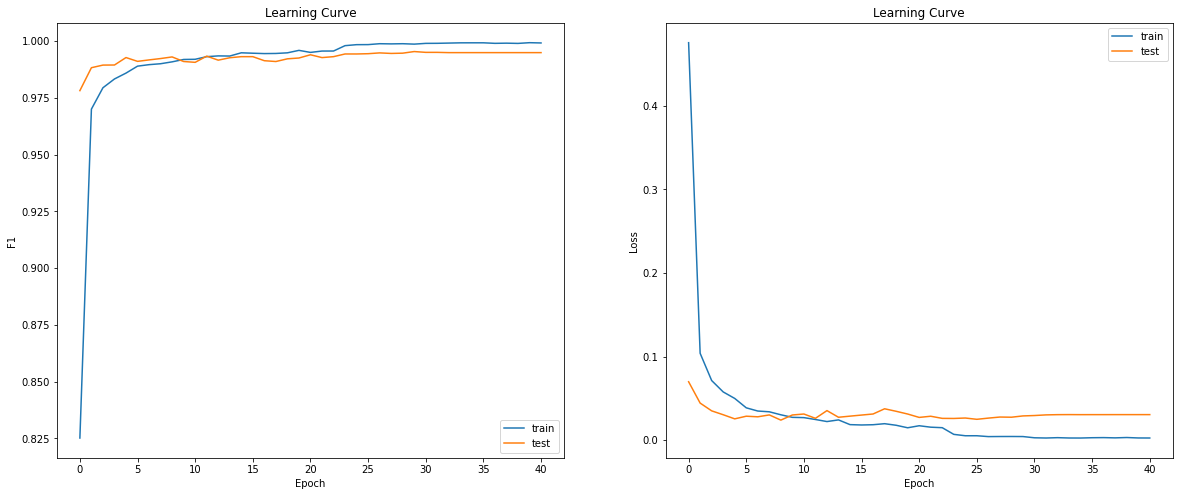

In [45]:
draw_learning_curve(learning_history)

### Let's see in which cases the model is invalid.

#### Let's assign the values provided by the model

In [46]:
y_pred = model.predict(X_val)

#### I made function to visual output

In [47]:
def draw_output(idx_nums):
    plt.figure(figsize = (20, 20))
    plt.xticks( range(10) )
    x = np.ceil(np.sqrt(len(idx_nums)))
    cnt = 1
    for ph in idx_nums:
        plt.subplot(x, x, cnt)
        curr_photo = y_val[ph]
        
        plt.xlim(0, 10)
        plt.title("Digit: {0}\n idx: {1} ".format(np.argmax(y_val[ph]), ph), fontsize = 10) 
        plt.bar(range(10), y_pred[ph])
        
        cnt += 1

#### The number of errors for the each digit

C:\Users\mmuqt\.conda\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


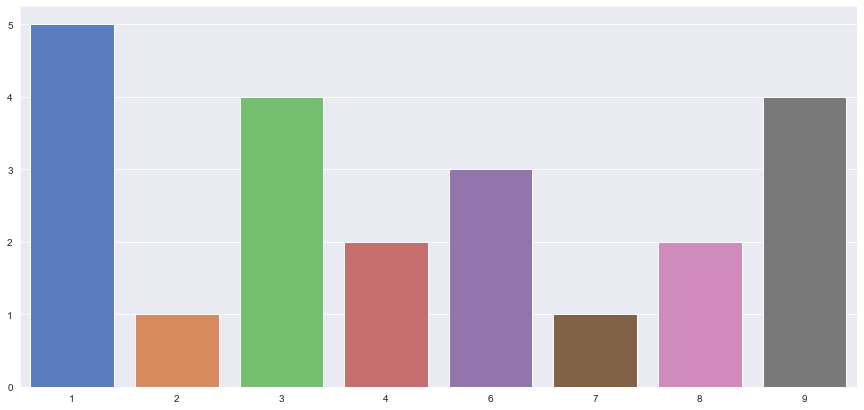

In [48]:
cnt_error = []
for idx, (a, b) in enumerate(zip(y_val, y_pred)):
    if np.argmax(a) == np.argmax(b): continue
    cnt_error.append( (np.argmax(a)) )

cnt_error = np.unique(cnt_error, return_counts = True)
sns.set_style("darkgrid")
plt.figure(figsize = (15, 7))
bar_plot = sns.barplot(cnt_error[0], cnt_error[1], palette="muted")
plt.show()

#### Let's see these photos (2, 9)

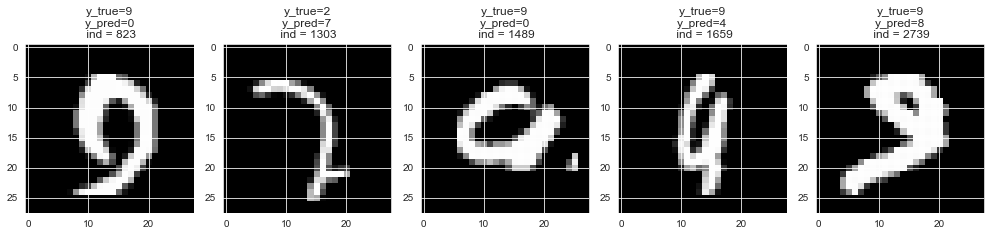

In [49]:
cnt_ind = 1
list_idx = []
X_val_plot = X_val.reshape( X_val.shape[:-1] )
fig = plt.figure(figsize=(14, 14))

for idx, (a, b) in enumerate(zip(y_val, y_pred)):
    if np.argmax(a) == np.argmax(b): continue
    if (np.argmax(a) == 2 or np.argmax(a) == 9):    
        plt.subplot(5, 5, cnt_ind)
        plt.imshow(X_val_plot[idx], cmap='gray', interpolation='none')
        plt.title('y_true={0}\ny_pred={1}\n ind = {2}'.format(np.argmax(a), np.argmax(b), idx))
        plt.tight_layout()
        list_idx.append(idx)
        cnt_ind += 1

#### Run the `draw_output` function to see the probability of each value occurring

C:\Users\mmuqt\.conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


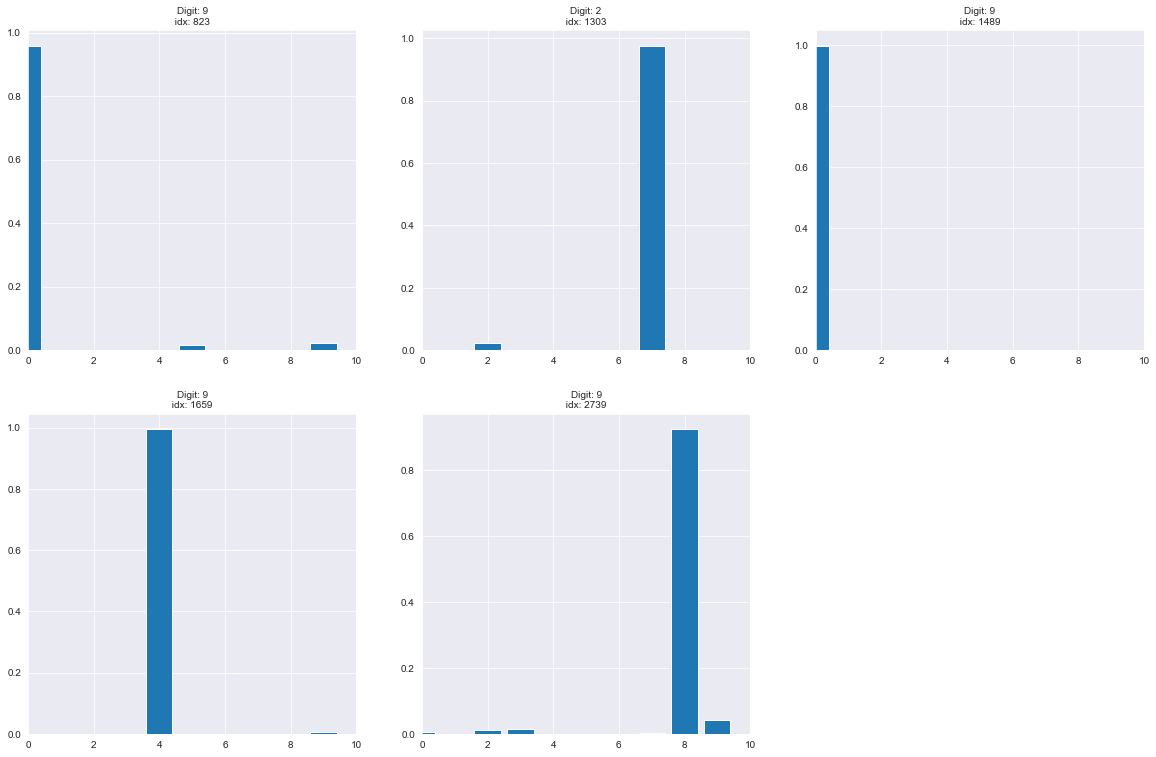

In [50]:
draw_output(list_idx)

#### As you can see, the model is wrong in cases where the common person would also have trouble finding the correct answer.

## Data Augmentation

#### I will try to improve the result by expanding the data. You have to be careful when rotating your photos not to misclassify numbers such as 9 and 6.

#### Data augmentation:

Randomly shift images horizontally by 10% of the width

Randomly shift images vertically by 10% of the height

Randomly rotate images by 10 degrees

Randomly Zoom by 10% some images


In [51]:
train_aug = ImageDataGenerator(
        featurewise_center = False,
        samplewise_center = False,
        featurewise_std_normalization = False, 
        samplewise_std_normalization = False,
        zca_whitening = False,
        horizontal_flip = False,
        vertical_flip = False,
        fill_mode = 'nearest',
        rotation_range = 10,  
        zoom_range = 0.1, 
        width_shift_range = 0.1, 
        height_shift_range = 0.1)
        

train_aug.fit(X_train)
train_gen = train_aug.flow(X_train, y_train, batch_size=64)

#### Building new model and using batch normalization

In [52]:
def get_cnn_v2():
    return Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = input_shape),
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same' ),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        
        Flatten(),
          
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(num_classes, activation = "softmax")
        
    ])

In [53]:
model = get_cnn_v2()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=[f1])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)       

In [54]:
learning_history = model.fit_generator(train_gen, epochs = 10, 
                               steps_per_epoch = X_train.shape[0] // 64,
                               validation_data = (X_val, y_val),
                               callbacks = callbacks('best_cnn'),
                             )

Epoch 1/10


C:\Users\mmuqt\.conda\envs\deeplearning\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


590/590 [==============================] - 92s 154ms/step - loss: 0.6432 - f1: 0.7829 - val_loss: 0.4278 - val_f1: 0.8662
Epoch 2/10
590/590 [==============================] - 90s 153ms/step - loss: 0.1610 - f1: 0.9532 - val_loss: 0.0770 - val_f1: 0.9764
Epoch 3/10
590/590 [==============================] - 96s 162ms/step - loss: 0.1201 - f1: 0.9650 - val_loss: 0.0487 - val_f1: 0.9846
Epoch 4/10
590/590 [==============================] - 92s 156ms/step - loss: 0.1017 - f1: 0.9718 - val_loss: 0.0582 - val_f1: 0.9817
Epoch 5/10
590/590 [==============================] - 104s 177ms/step - loss: 0.0875 - f1: 0.9756 - val_loss: 0.0432 - val_f1: 0.9853
Epoch 6/10
590/590 [==============================] - 92s 157ms/step - loss: 0.0816 - f1: 0.9777 - val_loss: 0.0576 - val_f1: 0.9822
Epoch 7/10
590/590 [==============================] - 98s 166ms/step - loss: 0.0755 - f1: 0.9790 - val_loss: 0.0517 - val_f1: 0.9848
Epoch 8/10
590/590 [==============================] - 100s 170ms/step - loss: 0

#### Loading the best model

In [55]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test score:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.02750660851597786
Test score: 0.9922851920127869
CNN Error: 0.77%


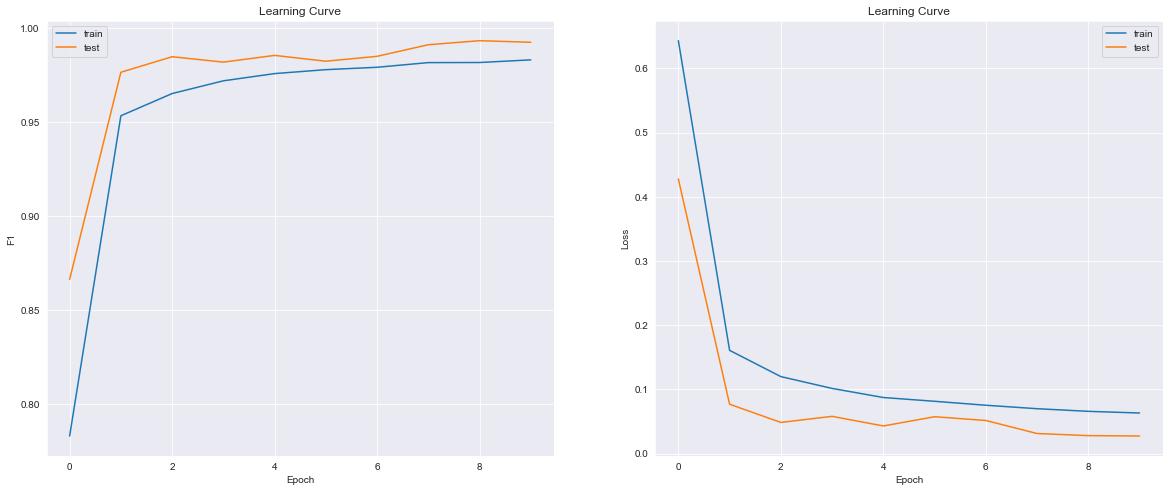

In [56]:
draw_learning_curve(learning_history)

#### We achieved a great result of 99.6% accuracy

# Generate output

In [57]:
output = model.predict(X_test)

output = np.argmax(output, axis = 1)

output = pd.Series(output, name="Label")

submission = pd.concat([pd.Series(range(1,28001), name = "ImageId"), output], axis = 1)

submission.to_csv("submission.csv", index=False)

# Bonus

Let's see, using additional data, how this will affect the final result.

In [58]:
def load_data(path='mnist.npz'):
    with np.load(path, allow_pickle=True) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)
    
(x_train1, y_train1), (x_test1, y_test1) = load_data("./mnist.npz")

In [59]:
x_train1 = x_train1 / 255
x_test1 = x_test1 / 255

x_train1 = x_train1.reshape(-1, 28, 28, 1)
x_test1 = x_test1.reshape(-1, 28, 28, 1)

y_train1 = y_train1.reshape(y_train1.shape[0], 1)
y_test1 = y_test1.reshape(y_test1.shape[0], 1)

In [60]:
Add_X = np.vstack((x_train1, x_test1))

Add_y = np.vstack((y_train1, y_test1))

Add_y = to_categorical(Add_y)

In [61]:
import pandas as pd

train = pd.read_csv("./mnist_train.csv")

X_train = train.drop(labels = ["label"], axis = 1)
y_train = train['label']
y_train = to_categorical(y_train)

X_train /= 255
X_train = X_train.values.reshape(-1, 28, 28, 1)

In [62]:
from keras.preprocessing.image import ImageDataGenerator

add_train_aug = ImageDataGenerator(
        featurewise_center = False,
        samplewise_center = False,
        featurewise_std_normalization = False, 
        samplewise_std_normalization = False,
        zca_whitening = False,
        horizontal_flip = False,
        vertical_flip = False,
        fill_mode = 'nearest',
        rotation_range = 10,  
        zoom_range = 0.1, 
        width_shift_range = 0.1, 
        height_shift_range = 0.1)
        

add_train_aug.fit(Add_X)
add_train_gen = add_train_aug.flow(Add_X, Add_y, batch_size=64)

In [63]:
model = get_cnn_v2()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=[f1])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)       

In [64]:
learning_history = model.fit_generator((add_train_gen), epochs = 10, 
                               steps_per_epoch = x_train1.shape[0] // 64,
                               validation_data = (X_val, y_val),
                               callbacks = callbacks('cnn_bonus'),
                             )

Epoch 1/10


C:\Users\mmuqt\.conda\envs\deeplearning\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


937/937 [==============================] - 167s 177ms/step - loss: 0.4836 - f1: 0.8390 - val_loss: 0.0655 - val_f1: 0.9790
Epoch 2/10
937/937 [==============================] - 158s 169ms/step - loss: 0.1258 - f1: 0.9638 - val_loss: 0.0484 - val_f1: 0.9867
Epoch 3/10
937/937 [==============================] - 148s 158ms/step - loss: 0.0961 - f1: 0.9734 - val_loss: 0.0329 - val_f1: 0.9918
Epoch 4/10
937/937 [==============================] - 147s 157ms/step - loss: 0.0821 - f1: 0.9765 - val_loss: 0.0300 - val_f1: 0.9904
Epoch 5/10
937/937 [==============================] - 147s 157ms/step - loss: 0.0735 - f1: 0.9801 - val_loss: 0.0254 - val_f1: 0.9919
Epoch 6/10
937/937 [==============================] - 159s 170ms/step - loss: 0.0632 - f1: 0.9826 - val_loss: 0.0241 - val_f1: 0.9927
Epoch 7/10
937/937 [==============================] - 165s 176ms/step - loss: 0.0644 - f1: 0.9822 - val_loss: 0.0451 - val_f1: 0.9874
Epoch 8/10
937/937 [==============================] - 169s 180ms/step - l

In [65]:
from tensorflow.keras.models import load_model

In [66]:
model = load_model('cnn_bonus.hdf5', custom_objects={"f1": f1})

In [67]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test score:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.001801724312826991
Test score: 0.9995265007019043
CNN Error: 0.05%


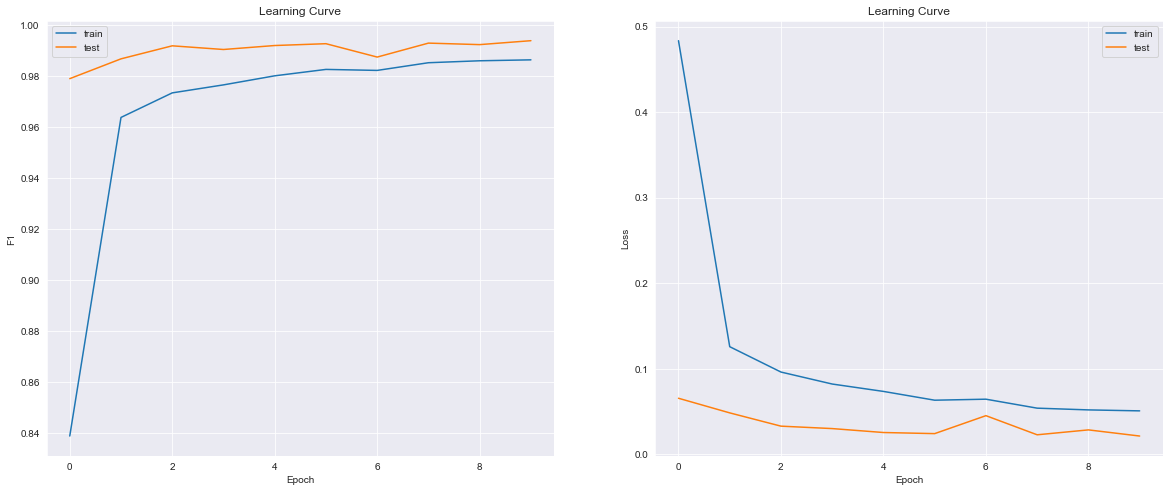

In [68]:
draw_learning_curve(learning_history)

#### As you can see, even with such a large data set, we do not get 100% accuracy

# Visualize Model

In [69]:
import graphviz
import pydot
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model

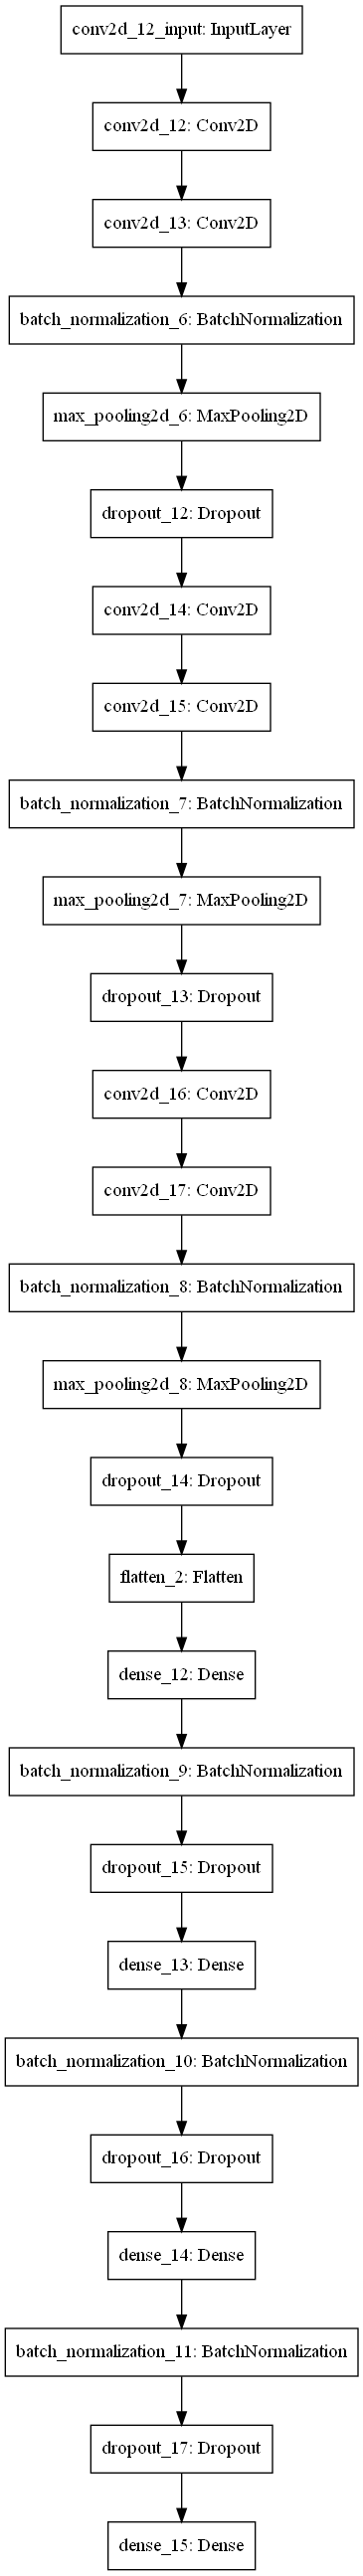

In [70]:
plot_model(model)

# Occlusion sensitivity

Type Markdown and LaTeX:  𝛼2

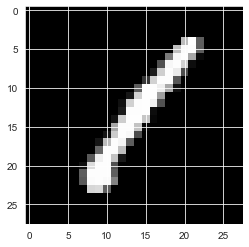

In [77]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray');

In [78]:
def apply_grey_patch(image, top_left_x, top_left_y, patch_size):
    patched_image = np.array(image, copy=True)
    patched_image[top_left_y:top_left_y + patch_size, top_left_x:top_left_x + patch_size, :] = 0

    return patched_image


img = X_train[0]

PATCH_SIZE = 4
sensitivity_map = np.zeros((img.shape[0], img.shape[0]))

for top_left_x in range(0, img.shape[0], PATCH_SIZE):
    for top_left_y in range(0, img.shape[1], PATCH_SIZE):
        patched_image = apply_grey_patch(img, top_left_x, top_left_y, PATCH_SIZE)
        
        
        predicted_classes = model.predict(np.array([patched_image]))[0]
        confidence = predicted_classes[1]
        
        sensitivity_map[
            top_left_y:top_left_y + PATCH_SIZE,
            top_left_x:top_left_x + PATCH_SIZE,
        ] = confidence

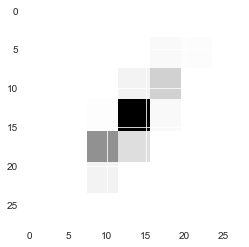

In [79]:
plt.imshow(sensitivity_map, cmap='gray');

# Generate bonus output

In [80]:
output = model.predict(X_test)

output = np.argmax(output, axis = 1)

output = pd.Series(output, name="Label")

submission = pd.concat([pd.Series(range(1,28001), name = "ImageId"), output], axis = 1)

submission.to_csv("bonus_submission.csv", index=False)

### Final step: Conclusions

#### I achieved the following results:

- MLP: ~98% f1
- CNN: ~100% f1